# 3.2. Linear Regression Implementation from Scratch
## 3.2.1. Generating the Dataset

In [1]:
import torch
import random

def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([0.6124, 0.5391]) 
label: tensor([3.5965])


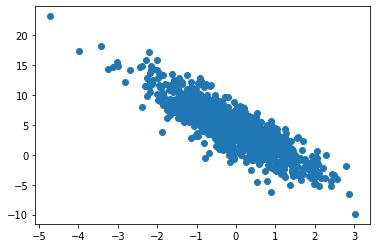

In [2]:
import matplotlib.pyplot as plt

plt.scatter(features[:,1], labels)

## 3.2.2. Reading the Dataset

In [3]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [4]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.7260,  0.8653],
        [ 0.6534, -0.9535],
        [-1.1941, -1.6253],
        [-0.3193,  2.0775],
        [ 0.1200, -0.5890],
        [ 0.0885,  1.8945],
        [-1.5794,  0.6057],
        [ 1.3719, -1.1594],
        [-0.1261,  1.4113],
        [ 0.4691,  0.0127]]) 
 tensor([[ 4.7039],
        [ 8.7412],
        [ 7.3329],
        [-3.5066],
        [ 6.4434],
        [-2.0615],
        [-1.0371],
        [10.8991],
        [-0.8485],
        [ 5.0882]])


## 3.2.3. Initializing Model Parameters

In [5]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
# w = torch.tensor([0.0, 0.0], requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print(w)
print(b)

tensor([0., 0.], requires_grad=True)
tensor([0.], requires_grad=True)


## 3.2.4. Defining the Model

In [6]:
def linreg(X, w, b):  #@save
    """The linear regression model."""
    return torch.matmul(X, w) + b

## 3.2.5. Defining the Loss Function

In [7]:
def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

## 3.2.6. Defining the Optimization Algorithm

In [8]:
def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

## 3.2.7. Training

In [9]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.021619
epoch 2, loss 0.000084
epoch 3, loss 0.000050


In [10]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0008, -0.0006], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0004], grad_fn=<RsubBackward1>)
